# **Lab 02: Khai thác và trực quan hóa dữ liệu**

### **Danh sách các thành viên**

<center>

|         Họ tên         |   MSSV   |
| :--------------------- | :------: |
| Trần Nguyễn Nhật Cường | 22127048 |
|    Nguyễn Công Tuấn    | 22127436 |
|     Trần Đăng Tuấn     | 22127438 |

</center>

## **Cài đặt và sử dụng các thư viện cần thiết**

In [89]:
! pip install matplotlib pandas seaborn wbgapi

In [90]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import wbgapi as wb

pd.options.display.float_format = "{:.2f}".format

**`csv** được dùng để xử lý tệp CSV (Comma-Separated Values) và đọc/ghi dữ liệu từ tệp CSV

**matplotlib`** được dùng để vẽ biểu đồ trong Python. Có thể dùng để vẽ các loại biểu đồ như
histogram, biểu đồ tán xạ (scatter plot), biểu đồ đường (line chart) và biểu đồ cột (bar chart),...

**`pandas`** được dùng để xử lý và phân tích dữ liệu dạng bảng và cung cấp cấu trúc dữ liệu như
DataFrame và Series để dễ thao tác

**`seaborn`** dùng để vẽ biểu đồ dựa trên thư viện matplotlib nhưng biểu đồ sẽ trông đẹp hơn
và cũng hỗ trợ các loại biểu đồ thống kê như violin plot, box plot, heatmap

## **Thu thập dữ liệu**

**Nền tảng thu thập** - *World Development Indicators* từ *World Bank*

**Phương pháp thư thập** - Gọi *APIs* từ **WBGAPI** - một package để truy cập vào dữ liệu *World Bank* - *Ngân hàng thế giới*

**Cách lưu trữ dữ liệu sau khi thu thập** - Lưu thành file **`wdi_2000_2020_VNM`**, **`wdi_2000_2020_USA`**  và **`wdi_2000_2020_JPN`** tương ứng với 3 quôc gia Việt Nam, Hoa Kỳ và Nhật Bản

In [91]:
countries = ["USA", "JPN", "VNM"]

indicators = {
    # Education
    "SE.PRM.COOF.FE": "Children out of school, primary, female",
    "SE.PRM.COOF.MA": "Children out of school, primary, male",
    "SE.XPD.TOTL.GD.ZS": "Government expenditure on education, total (% of GDP)",
    "SE.XPD.PRIM.PC.ZS": "Government expenditure per student, primary (% of GDP per capita)",
    "SE.XPD.SECO.PC.ZS": "Government expenditure per student, secondary (% of GDP per capita)",
    "SE.XPD.TERT.PC.ZS": "Government expenditure per student, tertiary (% of GDP per capita)",
    "SE.PRM.GINT.FE.ZS": "Gross intake ratio in first grade of primary education, female (% of relevant age group)",
    "SE.PRM.GINT.MA.ZS": "Gross intake ratio in first grade of primary education, male (% of relevant age group)",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SE.ADT.LITR.FE.ZS": "Literacy rate, adult female (% of females ages 15 and above)",
    "SE.ADT.LITR.MA.ZS": "Literacy rate, adult male (% of males ages 15 and above)",
    "SE.ADT.1524.LITR.FE.ZS": "Literacy rate, youth female (% of females ages 15-24)",
    "SE.ADT.1524.LITR.MA.ZS": "Literacy rate, youth male (% of males ages 15-24)",
    "SE.PRM.ENRL.TC.ZS": "Pupil-teacher ratio, primary",
    "SE.PRM.REPT.FE.ZS": "Repeaters, primary, female (% of female enrollment)",
    "SE.PRM.REPT.MA.ZS": "Repeaters, primary, male (% of male enrollment)",
    "SE.PRE.ENRR": "School enrollment, preprimary (% gross)",
    "SE.PRM.ENRR": "School enrollment, primary (% gross)",
    "SE.SEC.NENR": "School enrollment, secondary (% net)",
    "SE.PRM.TCAQ.ZS": "Trained teachers in primary education (% of total teachers)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",

    # Climate Change
    "EG.ELC.ACCS.ZS": "Access to electricity (% of population)",
    "AG.LND.IRIG.AG.ZS": "Agricultural irrigated land (% of total agricultural land)",
    "AG.LND.AGRI.ZS": "Agricultural land (% of land area)",
    "NV.AGR.TOTL.ZS": "Agriculture, forestry, and fishing, value added (% of GDP)",
    "ER.H2O.FWTL.K3": "Annual freshwater withdrawals, total (billion cubic meters)",
    "AG.LND.ARBL.ZS": "Arable land (% of land area)",
    "AG.YLD.CREL.KG": "Cereal yield (kg per hectare)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EG.USE.PCAP.KG.OE": "Energy use (kg of oil equivalent per capita)",
    "AG.LND.FRST.ZS": "Forest area (% of land area)",
    "AG.LND.FRST.K2": "Forest area (sq. km)",
    "AG.LND.EL5M.ZS": "Land area where elevation is below 5 meters (% of total land area)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.EL5M.ZS": "Population living in areas where elevation is below 5 meters (% of total population)",
    "SP.POP.TOTL": "Population, total",
    "EG.ELC.RNEW.ZS": "Renewable electricity output (% of total electricity output)",
    "EG.FEC.RNEW.ZS": "Renewable energy consumption (% of total final energy consumption)",
    "ER.PTD.TOTL.ZS": "Terrestrial and marine protected areas (% of total territorial area)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",

    # Economic and Growth
    "NY.ADJ.SVNG.GN.ZS": "Adjusted net savings, including particulate emission damage (% of GNI)",
    "NV.AGR.TOTL.ZS": "Agriculture, forestry, and fishing, value added (% of GDP)",  # Repeated from Climate Change
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.GSR.ROYL.CD": "Charges for the use of intellectual property, payments (BoP, current US$)",
    "BX.GSR.ROYL.CD": "Charges for the use of intellectual property, receipts (BoP, current US$)",
    "BN.CAB.XOKA.CD": "Current account balance (BoP, current US$)",
    "GC.XPN.TOTL.GD.ZS": "Expense (% of GDP)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "DT.DOD.DECT.GN.ZS": "External debt stocks (% of GNI)",
    "DT.DOD.DECT.CD": "External debt stocks, total (DOD, current US$)",
    "BX.KLT.DINV.CD.WD": "Foreign direct investment, net inflows (BoP, current US$)",
    "NY.GDP.MKTP.CD": "GDP (current US$)",
    "NY.GDP.MKTP.KD.ZG": "GDP growth (annual %)",
    "NY.GDP.PCAP.CD": "GDP per capita (current US$)",
    "NY.GDP.PCAP.KD.ZG": "GDP per capita growth (annual %)",
    "NY.GDP.PCAP.PP.CD": "GDP per capita, PPP (current international $)",
    "NY.GNP.PCAP.CD": "GNI per capita, Atlas method (current US$)",
    "NY.GNP.PCAP.PP.CD": "GNI per capita, PPP (current international $)",
    "NY.GNP.ATLS.CD": "GNI, Atlas method (current US$)",
    "NY.GNP.MKTP.PP.CD": "GNI, PPP (current international $)",
    "BX.GRT.EXTA.CD.WD": "Grants, excluding technical cooperation (BoP, current US$)",
    "NE.GDI.TOTL.ZS": "Gross capital formation (% of GDP)",
    "NY.GNS.ICTR.ZS": "Gross savings (% of GDP)",
    "NE.IMP.GNFS.ZS": "Imports of goods and services (% of GDP)",
    "NV.IND.TOTL.ZS": "Industry (including construction), value added (% of GDP)",
    "NY.GDP.DEFL.KD.ZG": "Inflation, GDP deflator (annual %)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "NV.MNF.TECH.ZS.UN": "Medium and high-tech manufacturing value added (% manufacturing value added)",
    "DT.ODA.ALLD.GN.ZS": "Net ODA received (% of GNI)",
    "DT.ODA.ALLD.PC.ZS": "Net ODA received per capita (current US$)",
    "DT.ODA.ALLD.CD": "Net official development assistance received (current US$)",
    "PA.NUS.PPP": "PPP conversion factor, GDP (LCU per international $)",
    "BX.TRF.PWKR.CD.DT": "Personal remittances, received (current US$)",
    "PA.NUS.PRVT.PP": "Price level ratio of PPP conversion factor (GDP) to market exchange rate",
    "GC.REV.XGRT.GD.ZS": "Revenue, excluding grants (% of GDP)",
    "DT.DOD.DSTC.ZS": "Short-term debt (% of total reserves)",
    "BX.GRT.TECH.CD.WD": "Technical cooperation grants (BoP, current US$)",
    "DT.TDS.DECT.EX.ZS": "Total debt service (% of exports of goods, services and primary income)",
    "FI.RES.TOTL.CD": "Total reserves (includes gold, current US$)"
}

years = range(2000, 2021)

for country in countries:
    data = wb.data.DataFrame(
        list(indicators.keys()),  
        country,                 
        time=years,                
        labels=False                
    ).reset_index()

    filename = f"wdi_2000_2020_{country}.csv"
    data.to_csv(filename, index=False)

## **Đọc bộ dữ liệu**

In [92]:
vn = pd.read_csv(filepath_or_buffer="./wdi_2000_2020_VNM.csv")
us = pd.read_csv(filepath_or_buffer="./wdi_2000_2020_USA.csv")
jp = pd.read_csv(filepath_or_buffer="./wdi_2000_2020_JPN.csv")

vn.head()

,series,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
0,AG.LND.AGRI.ZS,28.23,30.48,30.45,30.76,31.59,32.14,32.22,32.19,32.74,...,34.37,34.43,34.67,34.70,38.76,38.84,38.83,38.73,39.52,39.43
1,AG.LND.ARBL.ZS,19.93,21.37,21.25,21.22,20.86,20.32,20.29,20.19,20.09,...,20.55,20.42,20.52,20.45,22.35,22.33,22.30,22.18,21.64,21.65
2,AG.LND.EL5M.ZS,15.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,15.94,NaN,NaN,NaN,NaN,NaN
3,AG.LND.FRST.K2,117841.00,119444.96,121048.92,122652.88,124256.84,125860.80,127464.76,129068.72,130672.68,...,135228.20,136575.80,137923.40,139271.00,140618.60,143776.80,144153.90,144912.90,145671.90,146430.90
4,AG.LND.FRST.ZS,37.88,38.40,38.98,39.56,40.07,40.23,40.75,41.29,41.78,...,43.16,43.57,44.06,44.44,44.87,45.88,46.00,46.23,46.48,46.72


## **Khám phá dữ liệu**

Bảng bên dưới mô tả chi tiết ý nghĩa của các thuộc tính của World Developemtn Indicators trong bộ dữ liệu **`wdi_2000_2020_VNM.csv`**, **`wdi_2000_2020_USA.csv`** và **`wdi_2000_2020_JPN.csv`**

##### **Các chỉ số thuộc về lĩnh vực Giáo dục (Education)**

<center>

| **Mã chỉ số** | **Tên chỉ số** | **Mô tả** |
| ---- | ---- | ---- |
| **SE.PRM.COOF.FE** | Trẻ em nữ không đi học ở cấp tiểu học *[Children out of school, primary, female]* | Số lượng trẻ em gái trong độ tuổi đi học tiểu học nhưng không đi học |
| **SE.PRM.COOF.MA** | Trẻ em nam không đi học, cấp tiểu học *[Children out of school, primary, male]* | Số lượng trẻ em trai trong độ tuổi đi học tiểu học nhưng không đi học |
| **SE.XPD.TOTL.GD.ZS** |Chi tiêu công cho giáo dục (% GDP) *[Government expenditure on education, total (% of GDP)]*	| Tổng chi tiêu của chính phủ cho giáo dục tính theo phần trăm GDP |
| **SE.XPD.PRIM.PC.ZS**	| Chi tiêu công trên mỗi học sinh tiểu học (% GDP bình quân đầu người) *[Government expenditure per student, primary (% of GDP per capita)]* | Tỷ lệ chi tiêu công cho mỗi học sinh cấp tiểu học so với GDP bình quân đầu người |
| **SE.XPD.SECO.PC.ZS**	| Chi tiêu công trên mỗi học sinh trung học (% GDP bình quân đầu người) *[Government expenditure per student, secondary (% of GDP per capita)]* | Tỷ lệ chi tiêu công cho mỗi học sinh cấp trung học so với GDP bình quân đầu người |
| **SE.XPD.TERT.PC.ZS** | Chi tiêu công trên mỗi sinh viên đại học (% GDP bình quân đầu người) *[Government expenditure per student, tertiary (% of GDP per capita)]* |	Tỷ lệ chi tiêu công cho mỗi sinh viên đại học so với GDP bình quân đầu người |
| **SE.PRM.GINT.FE.ZS**	| Tỷ lệ tuyển sinh lớp 1, nữ *[Gross intake ratio in first grade of primary education, female (% of relevant age group)]* | Số lượng học sinh nữ nhập học lớp 1 trên tổng số trẻ em nữ trong độ tuổi tương ứng (tính theo phần trăm) |
| **SE.PRM.GINT.MA.ZS** | Tỷ lệ tuyển sinh lớp 1, nam *[Gross intake ratio in first grade of primary education, male (% of relevant age group)]* | Số lượng học sinh nam nhập học lớp 1 trên tổng số trẻ em nam trong độ tuổi tương ứng (tính theo phần trăm) |
| **SL.TLF.TOTL.FE.ZS** | Lực lượng lao động nữ (% tổng lực lượng lao động) *[Labor force, female (% of total labor force)]* | Tỷ lệ lao động nữ trong tổng lực lượng lao động của quốc gia |
| **SL.TLF.TOTL.IN** | Tổng lực lượng lao động *[Labor force, total]* | Tổng số người tham gia vào lực lượng lao động của quốc gia, bao gồm cả người có việc làm và người thất nghiệp đang tìm việc |
| **SE.ADT.LITR.FE.ZS** | Tỷ lệ biết chữ ở người lớn, nữ *[Literacy rate, adult female (% of females ages 15 and above)]* |	Tỷ lệ phần trăm phụ nữ từ 15 tuổi trở lên có thể đọc và viết |
| **SE.ADT.LITR.MA.ZS**	| Tỷ lệ biết chữ ở người lớn, nam *[Literacy rate, adult male (% of males ages 15 and above)]* | Tỷ lệ phần trăm nam giới từ 15 tuổi trở lên có thể đọc và viết |
| **SE.ADT.1524.LITR.FE.ZS** |	Tỷ lệ biết chữ ở thanh niên, nữ *[Literacy rate, youth female (% of females ages 15-24)]* | Tỷ lệ phần trăm nữ từ 15-24 tuổi có thể đọc và viết |
| **SE.ADT.1524.LITR.MA.ZS** |	Tỷ lệ biết chữ ở thanh niên, nam *[Literacy rate, youth male (% of males ages 15-24)]* | Tỷ lệ phần trăm nam từ 15-24 tuổi có thể đọc và viết |
| **SE.PRM.ENRL.TC.ZS**	| Tỷ lệ học sinh trên giáo viên cấp tiểu học *[Pupil-teacher ratio, primary]* |	Số lượng học sinh trung bình trên một giáo viên cấp tiểu học |
| **SE.PRM.REPT.FE.ZS** | Tỷ lệ học sinh nữ lưu ban cấp tiểu học *[Repeaters, primary, female (% of female enrollment)]* | Phần trăm học sinh nữ bị lưu ban tại cấp tiểu học |
| **SE.PRM.REPT.MA.ZS**	| Tỷ lệ học sinh nam lưu ban cấp tiểu học *[Repeaters, primary, male (% of male enrollment)]* |	Phần trăm học sinh nam bị lưu ban tại cấp tiểu học |
| **SE.PRE.ENRR** | Tỷ lệ nhập học mầm non (% tổng số) *[School enrollment, preprimary (% gross)]* | Tỷ lệ tổng số trẻ em nhập học mầm non so với tổng số trẻ em trong độ tuổi mầm non |
| **SE.PRM.ENRR** | Tỷ lệ nhập học tiểu học (% tổng số) *[School enrollment, primary (% gross)]* | Tỷ lệ tổng số học sinh nhập học cấp tiểu học so với tổng số trẻ em trong độ tuổi tiểu học |
| **SE.SEC.NENR** |	Tỷ lệ nhập học trung học (% số lượng thực tế) *[School enrollment, secondary (% net)]* | Tỷ lệ tổng số học sinh nhập học trung học so với số trẻ em trong độ tuổi tương ứng |
| **SE.PRM.TCAQ.ZS** |	Tỷ lệ giáo viên tiểu học được đào tạo *[Trained teachers in primary education (% of total teachers)]* | Phần trăm giáo viên tiểu học có bằng cấp đào tạo chính thức |
| **SL.UEM.TOTL.FE.ZS** | Tỷ lệ thất nghiệp ở nữ *[Unemployment, female (% of female labor force) (modeled ILO estimate)]* | Phần trăm nữ giới trong lực lượng lao động không có việc làm nhưng đang tìm kiếm việc làm |
| **SL.UEM.TOTL.MA.ZS** | Tỷ lệ thất nghiệp ở nam *[Unemployment, male (% of male labor force) (modeled ILO estimate)]* |	Phần trăm nam giới trong lực lượng lao động không có việc làm nhưng đang tìm kiếm việc làm |

</center>

##### **Các chỉ số thuộc về lĩnh vực Climate Change (Biến đổi khí hậu)**

| **Mã chỉ số** | **Tên chỉ số** | **Mô tả** |
| ---- | ---- | ---- |
| **EG.ELC.ACCS.ZS** | Dùng điện năng (% dân số) *[Access to electricity (% of population)]* | 	Tỷ lệ phần trăm dân số có quyền truy cập vào điện |
| **AG.LND.IRIG.AG.ZS** | Đất nông nghiệp có tưới tiêu (% tổng diện tích đất nông nghiệp)	 *[Agricultural irrigated land (% of total agricultural land)]* | Diện tích đất nông nghiệp được tưới tiêu trên tổng diện tích đất nông nghiệp |
| **AG.LND.AGRI.ZS** | Đất nông nghiệp (% tổng diện tích đất) *[Agricultural land (% of land area)]* | Phần trăm diện tích đất được sử dụng cho mục đích nông nghiệp so với tổng diện tích đất |
| **NV.AGR.TOTL.ZS** | Giá trị gia tăng của nông, lâm, ngư nghiệp (% GDP) *[Agriculture, forestry, and fishing, value added (% of GDP)]* | Tỷ lệ đóng góp của nông nghiệp, lâm nghiệp và thủy sản vào tổng sản phẩm quốc nội (GDP) |
| **ER.H2O.FWTL.K3** | Tổng lượng nước ngọt dùng hàng năm (tỷ m³) *[ Annual freshwater withdrawals, total (billion cubic meters)]* | Lượng nước ngọt được sử dụng hàng năm cho mục đích sinh hoạt, công nghiệp và nông nghiệp |
| **AG.LND.ARBL.ZS** | Đất canh tác (% tổng diện tích đất) *[Arable land (% of land area)]* | Tỷ lệ phần trăm đất có thể trồng trọt trên tổng diện tích đất |
| **AG.YLD.CREL.KG** | Sản lượng ngũ cốc (kg/ha)	*[Cereal yield (kg per hectare)]* | Sản lượng ngũ cốc trung bình trên mỗi hecta đất trồng trọt |
| **EG.USE.ELEC.KH.PC** | Tiêu thụ điện bình quân đầu người (kWh/người) *[Electric power consumption (kWh per capita)]* | Lượng điện năng tiêu thụ trung bình mỗi người trong một năm |
| **EG.USE.PCAP.KG.OE** | Tiêu thụ năng lượng bình quân đầu người (kg dầu tương đương/người) *[Energy use (kg of oil equivalent per capita)]* | Lượng năng lượng trung bình mỗi người tiêu thụ hàng năm, tính theo đơn vị kg dầu tương đương |
| **AG.LND.FRST.ZS** | Diện tích rừng (% tổng diện tích đất) *[Forest area (% of land area)]* | Tỷ lệ diện tích rừng so với tổng diện tích đất của quốc gia |
| **AG.LND.FRST.K2** | Tổng diện tích rừng (km²)  *[Forest area (sq. km)]* | Tổng diện tích đất được bao phủ bởi rừng, tính theo đơn vị km² |
| **AG.LND.EL5M.ZS** | Đất thấp dưới 5 mét so với mực nước biển (% tổng diện tích đất) | *[Land area where elevation is below 5 meters (% of total land area)]* | Phần trăm tổng diện tích đất nằm ở độ cao dưới 5 mét so với mực nước biển |
| **SP.POP.GROW** |  Tốc độ tăng dân số (% hàng năm) *[Population growth (annual %)]* | Tốc độ thay đổi dân số theo tỷ lệ phần trăm hàng năm |
| **SP.POP.EL5M.ZS** | Dân số sống ở vùng thấp dưới 5 mét so với mực nước biển (% tổng dân số) *[Population living in areas where elevation is below 5 meters (% of total population)]* | Tỷ lệ phần trăm dân số sinh sống ở khu vực có độ cao dưới 5 mét so với mực nước biển |
| **SP.POP.TOT**L | Tổng dân số *[Population, total]* | Tổng số người sinh sống trong một quốc gia hoặc vùng lãnh thổ tại một thời điểm nhất định |
| **EG.ELC.RNEW.ZS** | Sản lượng điện tái tạo (% tổng sản lượng điện) *[Renewable electricity output (% of total electricity output)]* | Tỷ lệ điện sản xuất từ các nguồn năng lượng tái tạo (như gió, mặt trời, thủy điện) so với tổng lượng điện sản xuất |
| **EG.FEC.RNEW.ZS** | Tiêu thụ năng lượng tái tạo (% tổng tiêu thụ năng lượng cuối cùng) *[Renewable energy consumption (% of total final energy consumption)]* | Tỷ lệ năng lượng tái tạo trong tổng mức tiêu thụ năng lượng cuối cùng | 
| **ER.PTD.TOTL.ZS** | Khu vực bảo tồn trên cạn và trên biển (% tổng diện tích lãnh thổ) *[Terrestrial and marine protected areas (% of total territorial area)]* | Phần trăm diện tích lãnh thổ được bảo vệ trên cạn và biển, bao gồm các khu bảo tồn thiên nhiên, vườn quốc gia |
| **SP.URB.TOTL** | Dân số đô thị *[Urban population]* | Tổng số người sinh sống tại khu vực đô thị |
| **SP.URB.TOTL.IN.ZS** | Dân số đô thị (% tổng dân số) *[Urban population (% of total population)]* | Phần trăm dân số sống tại khu vực đô thị so với tổng dân số của quốc gia |


##### **Các chỉ số thuộc về lĩnh vực Economic and Growth (Phát triển kinh tế)**

| Mã chỉ số | Tên chỉ số | Mô tả |
| ----  | ----- | ---- |
| **NY.ADJ.SVNG.GN.ZS** | Tiết kiệm ròng điều chỉnh, bao gồm thiệt hại do phát thải hạt (% GNI) *[Adjusted net savings, including particulate emission damage (% of GNI)]* | Chỉ số đo lường mức tiết kiệm ròng sau khi điều chỉnh cho suy giảm tài nguyên thiên nhiên và thiệt hại do ô nhiễm không khí |
| **NV.AGR.TOTL.ZS** | Giá trị gia tăng của nông, lâm, ngư nghiệp (% GDP) *[Agriculture, forestry, and fishing, value added (% of GDP)]* | Đóng góp của ngành nông nghiệp, lâm nghiệp và thủy sản vào GDP |
| **GC.DOD.TOTL.GD.ZS** | Nợ chính phủ trung ương (% GDP) *[Central government debt, total (% of GDP)]* | Tổng nợ của chính phủ trung ương so với GDP của quốc gia |
| **BM.GSR.ROYL.CD** | Thanh toán sử dụng quyền sở hữu trí tuệ (BoP, USD hiện tại) *[Charges for the use of intellectual property, payments (BoP, current US$)]* | Tổng số tiền một quốc gia thanh toán cho việc sử dụng bằng sáng chế, bản quyền, thương hiệu và các tài sản trí tuệ khác |
| **BX.GSR.ROYL.CD** | Thu nhập từ quyền sở hữu trí tuệ (BoP, USD hiện tại) *[Charges for the use of intellectual property, receipts (BoP, current US$)]* | Tổng số tiền một quốc gia nhận được từ việc cấp phép sử dụng tài sản trí tuệ |
| **BN.CAB.XOKA.CD** | Cán cân tài khoản vãng lai (BoP, USD hiện tại) *[Current account balance (BoP, current US$)]* | Sự chênh lệch giữa xuất nhập khẩu hàng hóa, dịch vụ, thu nhập ròng và chuyển nhượng ròng |
| **GC.XPN.TOTL.GD.ZS** |  Chi tiêu của chính phủ (% GDP) *[Expense (% of GDP)]* | Tổng chi tiêu của chính phủ so với GDP |
| **NE.EXP.GNFS.ZS** | Xuất khẩu hàng hóa và dịch vụ (% GDP) *[Exports of goods and services (% of GDP)]* | Tổng giá trị xuất khẩu hàng hóa và dịch vụ so với GDP |
| **DT.DOD.DECT.GN.ZS** | Tổng nợ nước ngoài (% GNI) *[External debt stocks (% of GNI)]* |Tổng giá trị nợ nước ngoài của một quốc gia so với tổng thu nhập quốc dân |
| **DT.DOD.DECT.CD** | Tổng nợ nước ngoài (USD hiện tại) **[External debt stocks, total (DOD, current US$)]** | Tổng giá trị nợ nước ngoài của quốc gia, tính bằng đô la Mỹ |
| **BX.KLT.DINV.CD.WD** | Đầu tư trực tiếp nước ngoài, dòng vốn vào ròng (BoP, USD hiện tại) *[Foreign direct investment, net inflows (BoP, current US$)]* | Tổng số vốn đầu tư trực tiếp từ nước ngoài vào quốc gia |
| **NY.GDP.MKTP.CD** | GDP (USD hiện tại) *[GDP (current US$)]* | Tổng sản phẩm quốc nội (GDP) của một quốc gia theo giá trị thị trường hiện tại |
| **NY.GDP.MKTP.KD.ZG** | Tăng trưởng GDP (% hàng năm) *[GDP growth (annual %)]* | Tỷ lệ tăng trưởng hàng năm của GDP, điều chỉnh theo lạm phát |
| **NY.GDP.PCAP.CD** | GDP bình quân đầu người (USD hiện tại) *[GDP per capita (current US$)]* | Tổng GDP chia cho dân số của quốc gia |
| **NY.GDP.PCAP.KD.ZG** | Tăng trưởng GDP bình quân đầu người (% hàng năm) *[GDP per capita growth (annual %)]* | Tốc độ tăng trưởng của GDP bình quân đầu người theo giá thực tế |
| **NY.GDP.PCAP.PP.CD** | GDP bình quân đầu người theo sức mua tương đương (PPP, USD quốc tế) *[GDP per capita, PPP (current international $)]* | GDP bình quân đầu người được điều chỉnh theo ngang giá sức mua (PPP) |
| **NY.GNP.PCAP.CD** | GNI bình quân đầu người, phương pháp Atlas (USD hiện tại) *[GNI per capita, Atlas method (current US$)]* | Tổng thu nhập quốc dân bình quân đầu người theo phương pháp Atlas |
| **NY.GNP.PCAP.PP.CD** | GNI bình quân đầu người theo PPP (USD quốc tế) *[GNI per capita, PPP (current international $)]* | Tổng thu nhập quốc dân bình quân đầu người điều chỉnh theo ngang giá sức mua |
| **NY.GNP.ATLS.CD** | GNI, phương pháp Atlas (USD hiện tại) *[GNI, Atlas method (current US$)]* | Tổng thu nhập quốc dân của quốc gia theo phương pháp Atlas |
| **NY.GNP.MKTP.PP.CD** | GNI theo PPP (USD quốc tế) *[GNI, PPP (current international $)]* |	Tổng thu nhập quốc dân được điều chỉnh theo ngang giá sức mua |
| **BX.GRT.EXTA.CD.WD** | Viện trợ không hoàn lại, trừ hợp tác kỹ thuật (BoP, USD hiện tại) *[Grants, excluding technical cooperation (BoP, current US$)]*	| Tổng giá trị viện trợ không hoàn lại mà một quốc gia nhận được, không bao gồm hợp tác kỹ thuật |
| **NE.GDI.TOTL.ZS** | Tổng đầu tư vốn (% GDP) *[Gross capital formation (% of GDP)]* | Tổng chi tiêu cho đầu tư vốn so với GDP |
| **NY.GNS.ICTR.ZS** | Tiết kiệm gộp (% GDP) *[Gross savings (% of GDP)]* | Phần trăm GDP được tiết kiệm sau khi trừ đi tiêu dùng của chính phủ và hộ gia đình |
| **NE.IMP.GNFS.ZS** | Nhập khẩu hàng hóa và dịch vụ (% GDP) *[Imports of goods and services (% of GDP)]* | Tổng giá trị nhập khẩu hàng hóa và dịch vụ so với GDP |
| **NV.IND.TOTL.ZS** | Giá trị gia tăng của ngành công nghiệp (% GDP) *[Industry (including construction), value added (% of GDP)]* | Đóng góp của ngành công nghiệp, bao gồm xây dựng, vào GDP |
| **NY.GDP.DEFL.KD.ZG** | Lạm phát, giảm phát GDP (% hàng năm) *[Inflation, GDP deflator (annual %)]* | Mức tăng giá chung của nền kinh tế được đo lường bằng chỉ số giảm phát GDP |
| **FP.CPI.TOTL.ZG** | Lạm phát, chỉ số giá tiêu dùng (% hàng năm) *[Inflation, consumer prices (annual %)]* | Tỷ lệ lạm phát hàng năm dựa trên chỉ số giá tiêu dùng (CPI) |
| **NV.MNF.TECH.ZS.UN** | Giá trị gia tăng của ngành sản xuất công nghệ vừa và cao (% tổng giá trị gia tăng của ngành sản xuất) *[Medium and high-tech manufacturing value added (% manufacturing value added)]* | Phần trăm giá trị gia tăng của ngành công nghiệp chế tạo có công nghệ vừa và cao |
| **DT.ODA.ALLD.GN.ZS** | Hỗ trợ phát triển chính thức ròng nhận được (% GNI) **[Net ODA received (% of GNI)]** | Tổng viện trợ phát triển chính thức mà quốc gia nhận được so với GNI |
| **FI.RES.TOTL.CD** | Dự trữ ngoại hối và vàng (USD hiện tại) *[Total reserves (includes gold, current US$)]* | Tổng giá trị dự trữ ngoại tệ và vàng của quốc gia |


## **Tiền xử lý dữ liệu**

### **Định dạng lại bộ dữ liệu**

**Mục đích**: Chuyển dữ liệu từ dạng rộng (wide format) sang dạng bảng chuẩn, giúp dễ dàng phân tích theo năm và quốc gia

**Các thực hiện**:

1. **Đọc dữ liệu** _ Mỗi chỉ số (*series*) là một hàng, các năm (*YR2000–YR2020*) là cột
vào cột Year và giá trị vào cột Value

2. **Chuyển sang long format** _ Dùng melt() để đưa năm vào cột Year và giá trị vào cột Value

3. **Chuẩn hóa dữ liệu** _ Chuyển Year về dạng số, thay dấu chấm (.) trong tên chỉ số bằng gạch dưới (_). 
    
    Ví dụ: **AG.LND.ARBL.ZS** $\rightarrow$ **AG_LND_ARBL_ZS**

4. **Pivot lại dữ liệu** _ Chuyển mỗi chỉ số thành một cột riêng, với Year làm cột chính

5. **Lưu kết quả** _ Áp dụng cho từng quốc gia và ghi đè vào file tương ứng

In [93]:
file_paths = {
    "VN": "wdi_2000_2020_VNM.csv",
    "US": "wdi_2000_2020_USA.csv",
    "JP": "wdi_2000_2020_JPN.csv"
}

transformed_dfs = {}

for country, df in {"VN": vn, "US": us, "JP": jp}.items():
    df_melted = df.melt(id_vars=["series"], var_name="Year", value_name="Value")
    
    df_melted["Year"] = df_melted["Year"].str.extract(r'(\d+)').astype(int)
    
    df_pivoted = df_melted.pivot(index="Year", columns="series", values="Value").reset_index()
    
    df_pivoted.columns.name = None
    df_pivoted.rename(columns=lambda x: x.replace(".", "_"), inplace=True)
    
    df_pivoted.to_csv(file_paths[country], index=False)
    
    print(f"Đã lưu dữ liệu cho {country} vào {file_paths[country]}")
    
    # Update the transformed DataFrame
    transformed_dfs[country] = df_pivoted

vn, us, jp = transformed_dfs["VN"], transformed_dfs["US"], transformed_dfs["JP"]

Đã lưu dữ liệu cho VN vào wdi_2000_2020_VNM.csv
Đã lưu dữ liệu cho US vào wdi_2000_2020_USA.csv
Đã lưu dữ liệu cho JP vào wdi_2000_2020_JPN.csv


### **Tổng quan về dữ liệu (sau khi thực hiện định dạng lại bộ dữ liệu)**

**Bộ dữ liệu của Việt Nam *[wdi_2000_2020_VNM]***

In [94]:
vn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 75 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               21 non-null     int32  
 1   AG_LND_AGRI_ZS     21 non-null     float64
 2   AG_LND_ARBL_ZS     21 non-null     float64
 3   AG_LND_EL5M_ZS     2 non-null      float64
 4   AG_LND_FRST_K2     21 non-null     float64
 5   AG_LND_FRST_ZS     21 non-null     float64
 6   AG_LND_IRIG_AG_ZS  0 non-null      float64
 7   AG_YLD_CREL_KG     21 non-null     float64
 8   BM_GSR_ROYL_CD     0 non-null      float64
 9   BN_CAB_XOKA_CD     21 non-null     float64
 10  BX_GRT_EXTA_CD_WD  21 non-null     float64
 11  BX_GRT_TECH_CD_WD  21 non-null     float64
 12  BX_GSR_ROYL_CD     0 non-null      float64
 13  BX_KLT_DINV_CD_WD  21 non-null     float64
 14  BX_TRF_PWKR_CD_DT  21 non-null     float64
 15  DT_DOD_DECT_CD     21 non-null     float64
 16  DT_DOD_DECT_GN_ZS  21 non-nu

In [95]:
vn_null_columns = vn.columns[vn.isnull().all()].tolist()

print("Các thuộc tính trong bộ dữ liệu Việt Nam [wdi_2000_2020_VNM] có toàn bộ giá trị là null:")
print(vn_null_columns)

Các thuộc tính trong bộ dữ liệu Việt Nam [wdi_2000_2020_VNM] có toàn bộ giá trị là null:
['AG_LND_IRIG_AG_ZS', 'BM_GSR_ROYL_CD', 'BX_GSR_ROYL_CD', 'GC_DOD_TOTL_GD_ZS', 'GC_REV_XGRT_GD_ZS', 'GC_XPN_TOTL_GD_ZS', 'SE_SEC_NENR', 'SE_XPD_SECO_PC_ZS']


**Nhận xét về bộ dữ liệu của Việt Nam *[wdi_2000_2020_VNM]* sau khi xử lý**
- Dữ liệu còn *21* dòng và *75* thuộc tính (cột)
- Tất cả các thuộc tính đều có kiểu dữ liệu là *float64* trừ thuộc tính **Year** có kiểu dữ liệu là *int32*
- Các thuộc tính không có dữ liệu nào bao gồm
    - **AG_LND_IRIG_AG_ZS**
    - **BM_GSR_ROYL_CD**
    - **BX_GSR_ROYL_CD**
    - **GC_DOD_TOTL_GD_ZS**
    - **GC_REV_XGRT_GD_ZS**
    - **GC_XPN_TOTL_GD_ZS**
    - **SE_SEC_NENR**
    - **SE_XPD_SECO_PC_ZS**

**Bộ dữ liệu của Hoa Kỳ *[wdi_2000_2020_USA]***

In [96]:
us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 75 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               21 non-null     int32  
 1   AG_LND_AGRI_ZS     21 non-null     float64
 2   AG_LND_ARBL_ZS     21 non-null     float64
 3   AG_LND_EL5M_ZS     2 non-null      float64
 4   AG_LND_FRST_K2     21 non-null     float64
 5   AG_LND_FRST_ZS     21 non-null     float64
 6   AG_LND_IRIG_AG_ZS  5 non-null      float64
 7   AG_YLD_CREL_KG     21 non-null     float64
 8   BM_GSR_ROYL_CD     21 non-null     float64
 9   BN_CAB_XOKA_CD     21 non-null     float64
 10  BX_GRT_EXTA_CD_WD  0 non-null      float64
 11  BX_GRT_TECH_CD_WD  0 non-null      float64
 12  BX_GSR_ROYL_CD     21 non-null     float64
 13  BX_KLT_DINV_CD_WD  21 non-null     float64
 14  BX_TRF_PWKR_CD_DT  21 non-null     float64
 15  DT_DOD_DECT_CD     0 non-null      float64
 16  DT_DOD_DECT_GN_ZS  0 non-nul

In [97]:
us_null_columns = us.columns[us.isnull().all()].tolist()

print("Các thuộc tính trong bộ dữ liệu Hoa Kỳ [wdi_2000_2020_USA] có toàn bộ giá trị là null:")
print(us_null_columns)

Các thuộc tính trong bộ dữ liệu Hoa Kỳ [wdi_2000_2020_USA] có toàn bộ giá trị là null:
['BX_GRT_EXTA_CD_WD', 'BX_GRT_TECH_CD_WD', 'DT_DOD_DECT_CD', 'DT_DOD_DECT_GN_ZS', 'DT_DOD_DSTC_ZS', 'DT_ODA_ALLD_CD', 'DT_TDS_DECT_EX_ZS', 'SE_ADT_LITR_FE_ZS', 'SE_ADT_LITR_MA_ZS']


**Nhận xét về bộ dữ liệu của Hoa Kỳ *[wdi_2000_2020_USA]* sau khi xử lý**
- Dữ liệu còn *21* dòng và *75* thuộc tính (cột)
- Tất cả các thuộc tính đều có kiểu dữ liệu là *float64* trừ thuộc tính **Year** có kiểu dữ liệu là *int32*
- Các thuộc tính không có dữ liệu nào bao gồm 
    - **BX_GRT_EXTA_CD_WD**
    - **BX_GRT_TECH_CD_WD**
    - **DT_DOD_DECT_CD**
    - **DT_DOD_DECT_GN_ZS**
    - **DT_DOD_DSTC_ZS**
    - **DT_ODA_ALLD_CD**
    - **DT_TDS_DECT_EX_ZS**
    - **SE_ADT_LITR_FE_ZS**
    - **SE_ADT_LITR_MA_ZS**

**Bộ dữ liệu của Nhật Bản *[wdi_2000_2020_JPN]***

In [98]:
jp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 75 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               21 non-null     int32  
 1   AG_LND_AGRI_ZS     21 non-null     float64
 2   AG_LND_ARBL_ZS     21 non-null     float64
 3   AG_LND_EL5M_ZS     2 non-null      float64
 4   AG_LND_FRST_K2     21 non-null     float64
 5   AG_LND_FRST_ZS     21 non-null     float64
 6   AG_LND_IRIG_AG_ZS  14 non-null     float64
 7   AG_YLD_CREL_KG     21 non-null     float64
 8   BM_GSR_ROYL_CD     21 non-null     float64
 9   BN_CAB_XOKA_CD     21 non-null     float64
 10  BX_GRT_EXTA_CD_WD  0 non-null      float64
 11  BX_GRT_TECH_CD_WD  0 non-null      float64
 12  BX_GSR_ROYL_CD     21 non-null     float64
 13  BX_KLT_DINV_CD_WD  21 non-null     float64
 14  BX_TRF_PWKR_CD_DT  21 non-null     float64
 15  DT_DOD_DECT_CD     0 non-null      float64
 16  DT_DOD_DECT_GN_ZS  0 non-nul

In [99]:
jp_null_columns = jp.columns[jp.isnull().all()].tolist()

print("Các thuộc tính trong bộ dữ liệu Nhật Bản [wdi_2000_2020_JPN] có toàn bộ giá trị là null:")
print(jp_null_columns)

Các thuộc tính trong bộ dữ liệu Nhật Bản [wdi_2000_2020_JPN] có toàn bộ giá trị là null:
['BX_GRT_EXTA_CD_WD', 'BX_GRT_TECH_CD_WD', 'DT_DOD_DECT_CD', 'DT_DOD_DECT_GN_ZS', 'DT_DOD_DSTC_ZS', 'DT_ODA_ALLD_CD', 'DT_TDS_DECT_EX_ZS', 'GC_REV_XGRT_GD_ZS', 'SE_ADT_LITR_FE_ZS', 'SE_ADT_LITR_MA_ZS', 'SE_PRM_GINT_FE_ZS', 'SE_PRM_GINT_MA_ZS', 'SE_PRM_TCAQ_ZS', 'SE_SEC_NENR']


**Nhận xét về bộ dữ liệu của Nhật Bản *[wdi_2000_2020_JPN]* sau khi xử lý**
- Dữ liệu còn *21* dòng và *75* thuộc tính (cột)
- Tất cả các thuộc tính đều có kiểu dữ liệu là *float64* trừ thuộc tính **Year** có kiểu dữ liệu là *int32*
- Các thuộc tính không có dữ liệu nào bao gồm 
    - **BX_GRT_EXTA_CD_WD**
    - **BX_GRT_TECH_CD_WD**
    - **DT_DOD_DECT_CD**
    - **DT_DOD_DECT_GN_ZS**
    - **DT_DOD_DSTC_ZS**
    - **DT_ODA_ALLD_CD**
    - **DT_TDS_DECT_EX_ZS**
    - **GC_REV_XGRT_GD_ZS**
    - **SE_ADT_LITR_FE_ZS**
    - **SE_ADT_LITR_MA_ZS**
    - **SE_PRM_GINT_FE_ZS**
    - **SE_PRM_GINT_MA_ZS**
    - **SE_PRM_TCAQ_ZS**
    - **SE_SEC_NENR**

## **Các câu hỏi**

### **Chủ đề Giáo dục**

#### **Câu 1**: Chi tiêu của chính phủ cho giáo dục (tổng cộng, tính bằng % GDP) tại Nhật Bản, Việt Nam và Hoa Kỳ đã thay đổi như thế nào từ năm 2000 đến năm 2020?


**Thuộc tính được sử dụng**
1. *SE_XPD_TOTL_GD_ZS* - Chi tiêu của chính phủ cho giáo dục, tổng cộng (% GDP)
2. *Year* - Năm để theo dõi sự thay đổi theo thời gian

**Các bước thực hiện**
1. Lọc dữ liệu (lấy thuộc tính *Year* và *SE_XPD_TOTL_GD_ZS*) từ bộ dữ liệu của Nhật Bản, Việt Nam và Hoa Kỳ
2. Vẽ biểu đồ đường để thể hiện sự thay đổi của chi tiêu giáo dục theo thời gian cho từng quốc gia nhằm so sánh mức chi tiêu giáo dục (% GDP) qua các năm cho từng quốc gia và xác định xu hướng (tăng, giảm, hoặc dao động) từ 2000 đến 2020

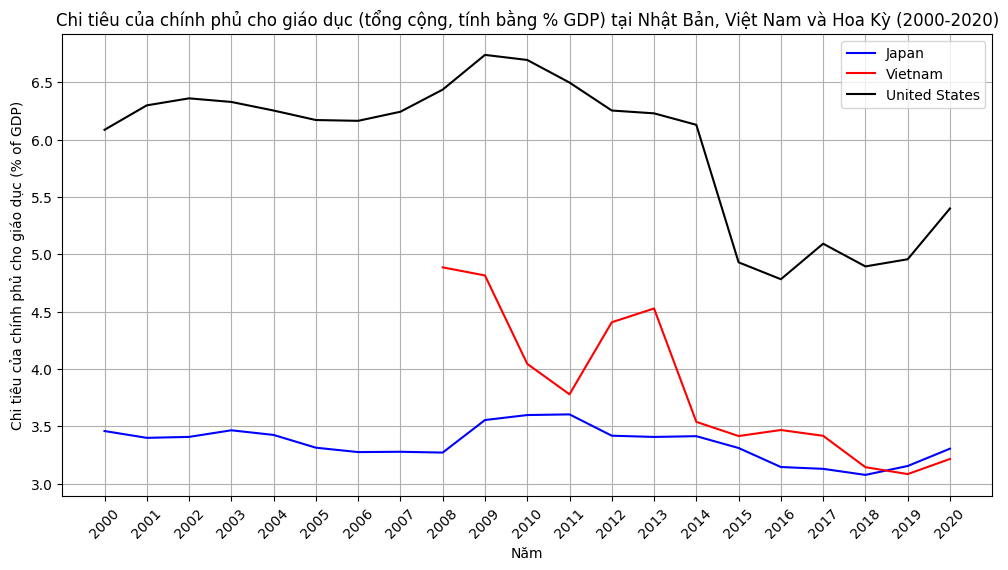

In [ ]:
years = np.arange(2000, 2021, 1)

plt.figure(figsize=(12, 6))
plt.plot(years, jp["SE_XPD_TOTL_GD_ZS"], "b-", label="Nhật Bản")
plt.plot(years, vn["SE_XPD_TOTL_GD_ZS"], "r-", label="Việt Nam")
plt.plot(years, us["SE_XPD_TOTL_GD_ZS"], "k-", label="Hoa Kỳ")

plt.xticks(years.astype(int), rotation=45)
plt.title("Chi tiêu của chính phủ cho giáo dục (tổng cộng, tính bằng % GDP) tại Nhật Bản, Việt Nam và Hoa Kỳ (2000-2020)")
plt.xlabel("Năm")
plt.ylabel("Chi tiêu của chính phủ cho giáo dục (% of GDP)")
plt.legend()
plt.grid(True)
plt.show()

**Nhận xét về chi tiêu của chính phủ cho giáo dục (tổng cộng, tính bằng % GDP) tại Nhật Bản, Việt Nam và Hoa Kỳ (2000-2020)**

- Ở **Nhật Bản (đường màu xanh)**, chi tiêu cho giáo dục của chính phủ dao động trong khoảng **3.1% - 3.6% GDP**, có xu hướng tổng thể **ổn định nhưng hơi giảm nhẹ**. Mức chi tiêu cao nhất là **khoảng 3.6% vào năm 2010**, trong khi mức thấp nhất là **khoảng 3.1% vào năm 2018**

- Ở **Việt Nam (đường màu đỏ)**, chi tiêu cho giáo dục dao động khá mạnh trong khoảng **3.0% - 4.9% GDP**, với xu hướng tổng thể **giảm dần theo thời gian**. Mức chi tiêu cao nhất đạt **gần 4.9% vào năm 2008**, nhưng sau đó giảm dần và đạt mức thấp nhất **khoảng 3.0% vào năm 2019**

- Ở **Hoa Kỳ (đường màu đen)**, chi tiêu cho giáo dục biến động trong khoảng **4.8% - 6.7% GDP**, có xu hướng tổng thể **giảm dần**. Mức cao nhất là khoảng **6.7% vào năm 2009**, sau đó giảm đáng kể xuống **4.8% vào năm 2015**, rồi phục hồi nhẹ vào năm 2020

**Kết luận**
- Nhật Bản có mức chi tiêu **ổn định** nhưng **thấp hơn** so với hai nước còn lại.

- Việt Nam có sự **sụt giảm** rõ rệt sau năm 2010. Điều này phản ánh sự thay đổi chính sách tài chính cho giáo dục

- Hoa Kỳ có mức chi tiêu **cao nhất** trong ba nước nhưng có xu hướng **giảm mạnh** từ sau năm 2010

#### **Câu 2:** Phân bố thời lượng các bài hát trên Spotify tại thị trường âm nhạc Việt Nam như thế nào?

**Các bước thực hiện**:
1. Chuyển đổi dữ liệu thời lượng bài hát
2. Vẽ biểu đồ histogram thể hiện phân bố thời lượng bài hát
3. Tùy chỉnh trục, nhãn và tiêu đề cho biểu đồ
4. Hiển thị biểu đồ kết quả
5. Viết nhận xét

In [101]:
tracks["duration_min"] = tracks["duration_ms"] / 60000  

NameError: name 'tracks' is not defined

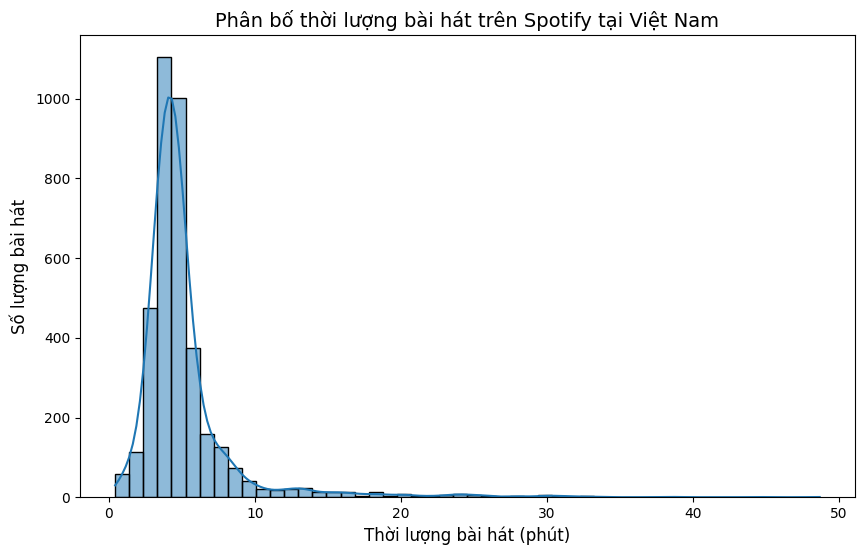

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(tracks["duration_min"], bins=50, kde=True)

plt.title("Phân bố thời lượng bài hát trên Spotify tại Việt Nam", fontsize=14)
plt.xlabel("Thời lượng bài hát (phút)", fontsize=12)
plt.ylabel("Số lượng bài hát", fontsize=12)

plt.savefig("song-time-distribution.svg", format="svg", dpi=300)
plt.show()

**Nhận xét về phân bố thời lượng bài hát trên Spotify tại Việt Nam**

- **Thời lượng trung bình** của bài hát trên Spotify tại Việt Nam thường dao động trong khoảng **3 - 4 phút** và các bài hát có **thời lượng trên 10 phút** là **vô cùng ít**

- **Phân phối lệch phải** cho thấy phần lớn bài hát có **độ dài ngắn**, chỉ một số ít bài hát có độ dài vượt trội và xu hướng này phù hợp với xu hướng nghe nhạc trực tuyến, khi người dùng **có xu hướng ưa chuộng các bài hát có độ dài tiêu chuẩn** (3 - 4 phút) thay vì các bài hát quá dài

#### **Câu 3:**  Những nghệ sĩ nào phát hành nhiều bài hát nhất trên Spotify tại thị trường âm nhạc Việt Nam trong năm 2024?

**Các bước thực hiện**:
1. Lọc dữ liệu bài hát phát hành trong năm 2024
2. Tách danh sách nghệ sĩ và đếm số bài hát của từng nghệ sĩ
3. Vẽ biểu đồ barplot thể hiện nghệ sĩ có nhiều bài hát nhất
4. Tùy chỉnh trục, nhãn và tiêu đề cho biểu đồ
5. Lưu và hiển thị biểu đồ
6. Viết nhận xét

In [ ]:
tracks_2024 = tracks[tracks["release_date"].dt.year == 2024]
tracks_by_artist_2024 = tracks_2024["artists"].str.split(pat=", ").explode().str.strip().value_counts().reset_index()
tracks_by_artist_2024

,artists,count
0,Hoa Tau,74
1,Trọng Hữu,22
2,Bảo Quốc,22
3,Phượng Liên,19
4,Thanh Nga,19
...,...,...
291,IC Music,1
292,Phương Ly,1
293,Xuan Tuyen,1
294,Hồng Duyên,1


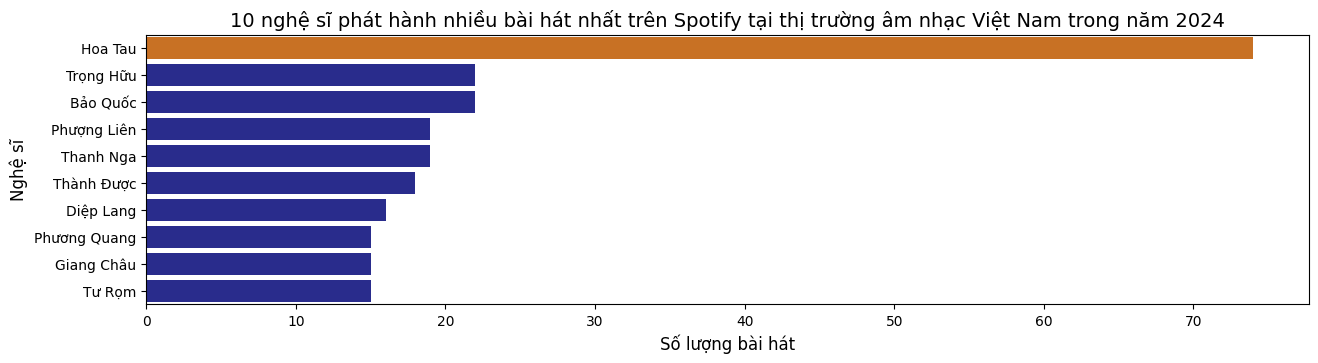

In [ ]:
plt.figure(figsize=(15, 3.5))

sns.barplot(data=tracks_by_artist_2024.head(n=10), x="count", y="artists", hue="artists", orient="h",
            palette=["#e36f09" if count > 60 else "#191d9c" for count in tracks_by_artist_2024["count"].head(n=10)])

plt.xlabel(xlabel="Số lượng bài hát", fontsize=12)
plt.ylabel(ylabel="Nghệ sĩ", fontsize=12)
plt.title(label="10 nghệ sĩ phát hành nhiều bài hát nhất trên Spotify tại thị trường âm nhạc Việt Nam trong năm 2024", fontsize=14)

plt.savefig("top_artists.svg", format="svg", dpi=300)
plt.show()

**Nhận xét về 10 nghệ sĩ phát hành nhiều bài hát nhất trên Spotify tại thị trường âm nhạc Việt Nam trong năm 2024**

- **Hoa Tau** có số lượng bài hát phát hành **cao nhất**, vượt xa các nghệ sĩ còn lại với **hơn 75 bài hát** và **khoảng cách** giữa **Hoa Tau** và **nghệ sĩ đứng thứ hai** (Bảo Quốc & Trọng Hữu) là **rất lớn**
- Từ vị trí thứ 2 đến thứ 10, **số lượng bài hát** dao động trong khoảng **15 - 25 bài** hát và **cũng khá đồng đều**

#### **Câu 4:** Tỉ lệ các loại album trên Spotify tại thị trường âm nhạc Việt Nam như thế nào?

**Các bước thực hiện**:
1. Đếm số lượng từng loại album
2. Vẽ biểu đồ tròn (pie chart) thể hiện tỉ lệ từng loại album
3. Tùy chỉnh tiêu đề và bố cục biểu đồ
4. Lưu và hiển thị biểu đồ
5. Viết nhận xét

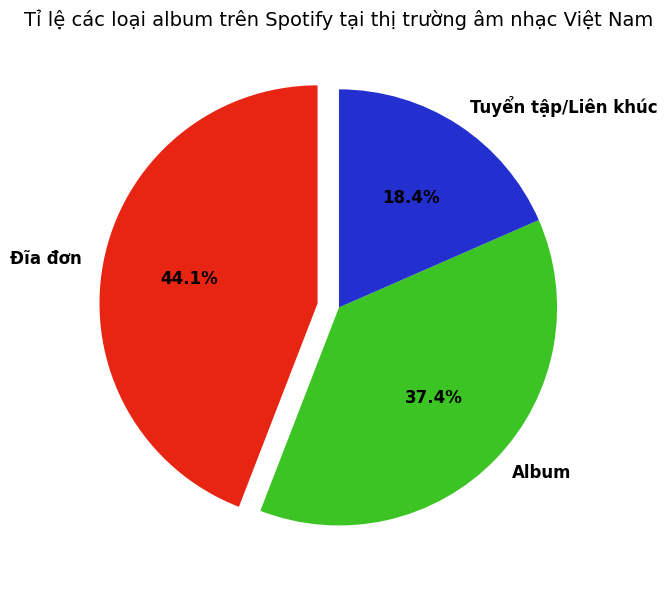

In [ ]:
tracks["album_type"].value_counts().plot.pie(
    labels=["Đĩa đơn", "Album", "Tuyển tập/Liên khúc"],
    autopct="%1.1f%%",
    startangle=90,
    figsize=(8, 6),
    explode=(0.1, 0, 0),
    colors=["#e82413", "#3bc423", "#232fcf"],
    textprops={"fontsize": 12, "fontweight": "bold"},
)

plt.title(label="Tỉ lệ các loại album trên Spotify tại thị trường âm nhạc Việt Nam", fontsize=14)
plt.ylabel(ylabel="")

plt.tight_layout()
plt.savefig("album_type_percentage.svg", format="svg", dpi=300)
plt.show()

**Nhận xét về tỉ lệ các loại album trên Spotify tại thị trường âm nhạc Việt Nam**

- **Đĩa đơn** chiếm  chiếm tỷ lệ cao nhất **44.1%** phản ánh xu hướng phát hành nhạc theo từng bài hát lẻ thay vì ra mắt toàn bộ album cùng lúc. Điều này có thể do sự phát triển của nền tảng phát nhạc trực tuyến, nơi nghệ sĩ có thể tiếp cận khán giả nhanh chóng với từng ca khúc thay vì chờ hoàn thiện cả album.
- **Tuyển tập/Liên khúc** chiếm **18.4%** cho thấy tính **ít phổ biến hơn**, có thể do đặc thù của loại album này chủ yếu được phát hành theo *sự kiện* hoặc bởi *các hãng thu âm lớn*

#### **Câu 5:** Phân bố số lượng người theo dõi và độ phổ biến của các nghệ sĩ trên Spotify tại thị trường âm nhạc Việt Nam như thế nào?

**Các bước thực hiện**:
1. Sử dụng dữ liệu followers và popularity từ bảng artists
2. Vẽ biểu đồ scatter plot
3. Tùy chỉnh biểu đồ
4. Tinh chỉnh bố cục và lưu biểu đồ
5. Viết nhận xét

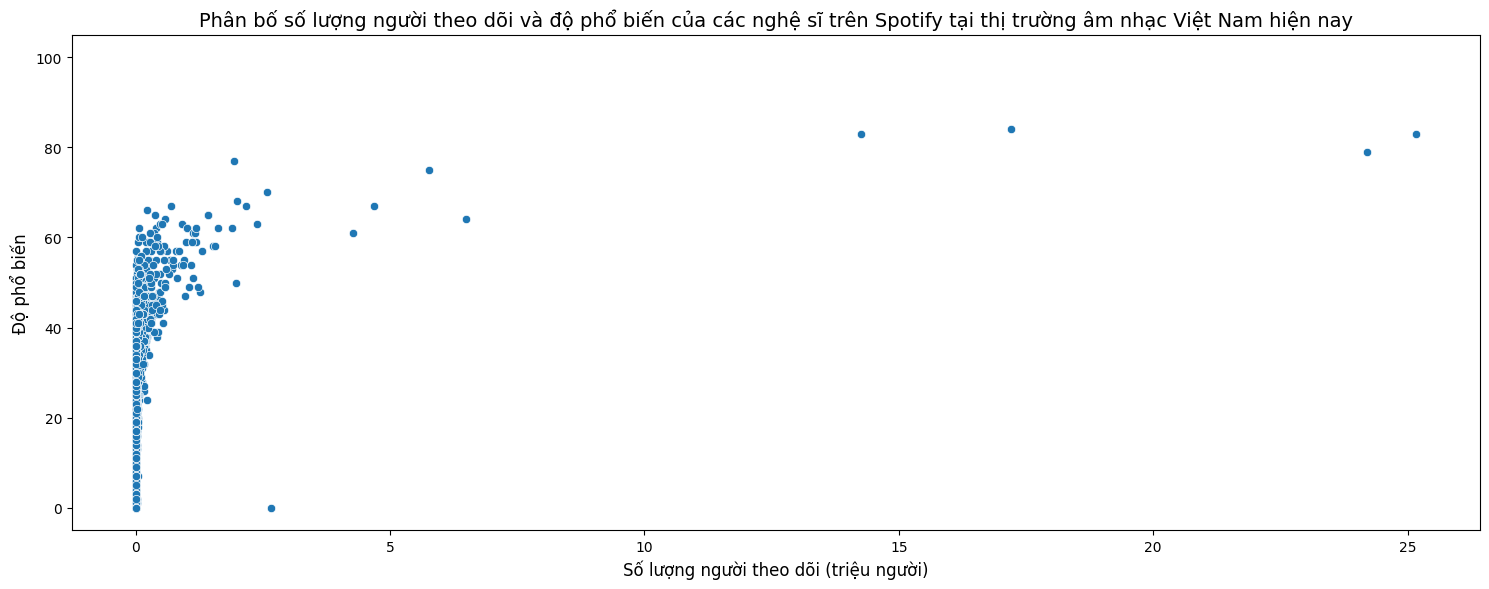

In [ ]:
plt.figure(figsize=(15, 6))

sns.scatterplot(data=artists, x="followers", y="popularity")

plt.xlabel(xlabel="Số lượng người theo dõi (triệu người)", fontsize=12)
plt.ylabel(ylabel="Độ phổ biến", fontsize=12)
plt.title(label="Phân bố số lượng người theo dõi và độ phổ biến của các nghệ sĩ trên Spotify tại thị trường âm nhạc Việt Nam hiện nay", fontsize=14)

plt.xticks(ticks=range(0, 25000001, 5000000), labels=[f"{i}" for i in range(0, 26, 5)])
plt.yticks(ticks=range(0, 101, 20))
plt.ylim(bottom=-5, top=105)

plt.tight_layout()
plt.savefig("followers_popularity_distribution.svg", format="svg", dpi=300)
plt.show()

**Nhận xét về phân bố số lượng người theo dõi và độ phổ biến của các nghệ sĩ trên Spotify tại thị trường âm nhạc Việt Nam hiện nay**

- **Phần lớn nghệ sĩ** có số lượng người theo dõi **khá thấp** (**dưới 1 triệu**) nhưng vẫn có **độ phổ biến trung bình đến cao** bên cạnh đó là một số **ít nghệ sĩ** có lượng theo dõi **rất cao** (**>10 triệu**) và **độ phổ biến cũng cao**
- Có một số điểm dữ liệu **nằm rải rác** thể hiện **các nghệ sĩ có lượng người theo dõi cao** nhưng **độ phổ biến không quá nổi bật** hoặc ngược lại
- Vì thế, nhìn chung, **độ phổ biến** không chỉ phụ thuộc vào **số người theo dõi** mà còn bị **ảnh hưởng bởi các yếu tố khác** như *tần suất ra nhạc*, *mức độ viral của bài hát*,...

#### **Câu 6:** Gom nhóm nghệ sĩ và đưa gợi ý về chiến lược phát triển cho từng nhóm

**Các bước thực hiện**:
1. Chuẩn bị dữ liệu bằng việc chọn các thuộc tính followers (số lượng người theo dõi) và
popularity (độ phổ biến) để phân cụm
2. Chuẩn hóa dữ liệu
3. Xác định số cụm tối ưu
4.  Áp dụng thuật toán K-Means với k = ?
5. Minh họa phân cụm bằng biểu đồ violin plot
6. Đề xuất chiến lược phát triển cho từng nhóm

In [ ]:
features = artists.loc[:, ["followers", "popularity"]]
features

,followers,popularity
0,0,0
1,50154,43
2,2,0
3,128,4
4,19887,13
...,...,...
1467,1176658,62
1468,778,17
1469,479164,44
1470,295725,41


In [ ]:
features_scaled = StandardScaler().fit_transform(features)
features_scaled

array([[-0.1252283 , -1.3797145 ],
       [-0.08103981,  0.98299339],
       [-0.12522654, -1.3797145 ],
       ...,
       [ 0.29694212,  1.03794008],
       [ 0.13532205,  0.8731    ],
       [ 1.12621691,  2.19182068]])

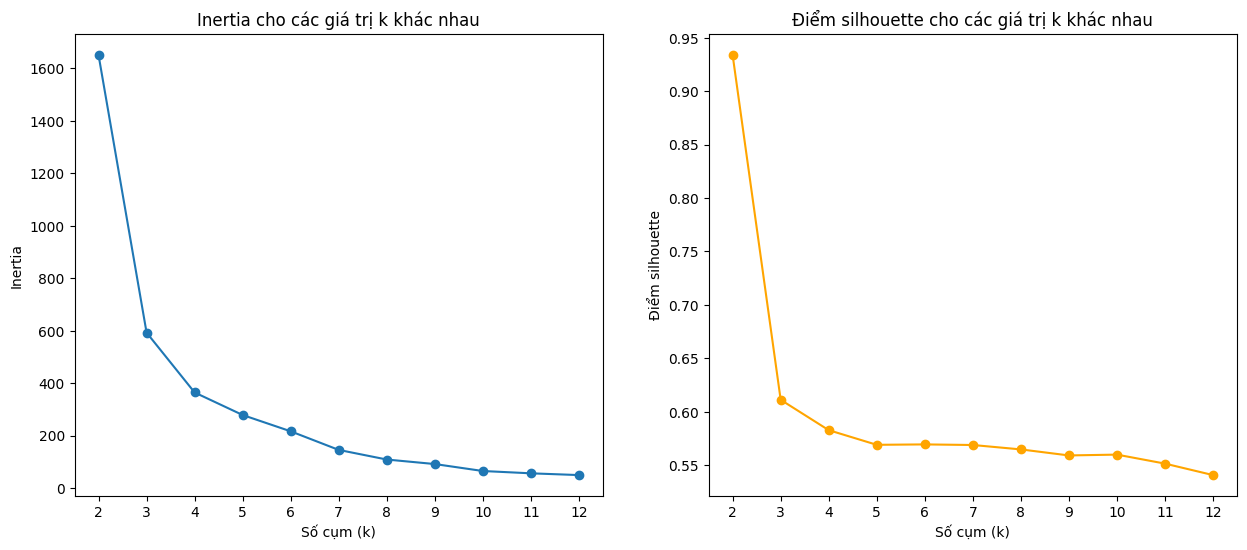

In [ ]:
inertias = []
silhouette_scores = []
k_values = range(2, 13)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=2, max_iter=1000)
    cluster_labels = kmeans.fit_predict(features_scaled)
    silhouette_scores.append(silhouette_score(features_scaled, cluster_labels))
    inertias.append(kmeans.inertia_)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
axes[0].plot(k_values, inertias, marker="o")
axes[0].set_title(label="Inertia cho các giá trị k khác nhau")
axes[0].set_xlabel(xlabel="Số cụm (k)")
axes[0].set_ylabel(ylabel="Inertia")
axes[0].set_xticks(ticks=k_values)

axes[1].plot(k_values, silhouette_scores, marker="o", color="orange")
axes[1].set_title("Điểm silhouette cho các giá trị k khác nhau")
axes[1].set_xlabel(xlabel="Số cụm (k)")
axes[1].set_ylabel(ylabel="Điểm silhouette")
axes[1].set_xticks(ticks=k_values)

plt.savefig("inertia.svg", format="svg", dpi=300)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=2, max_iter=1000)
cluster_labels = kmeans.fit_predict(features_scaled)
cluster_labels

array([0, 2, 0, ..., 2, 2, 2])

In [ ]:
artists["cluster"] = cluster_labels
artists.head()

,name,followers,popularity,spotify_url,cluster
0,Phi Thoàn,0,0,https://open.spotify.com/artist/2aTU3x15AENbho...,0
1,D Blue,50154,43,https://open.spotify.com/artist/7JRDlOAUMJuLKm...,2
2,Tridang,2,0,https://open.spotify.com/artist/7ooiucbWXydMWY...,0
3,Redshine,128,4,https://open.spotify.com/artist/6V2hxt1eky76f5...,0
4,Uyên Trang,19887,13,https://open.spotify.com/artist/5ZTYPfGq5HTtBj...,0


In [ ]:
artists[artists["followers"] == 0]

,name,followers,popularity,spotify_url,cluster
0,Phi Thoàn,0,0,https://open.spotify.com/artist/2aTU3x15AENbho...,0
6,ウッ・バッ・ラン,0,0,https://open.spotify.com/artist/1TiyIGdIu0d5EH...,0
13,NSUT Ngọc Giàu,0,0,https://open.spotify.com/artist/75xURm9qVgcoaI...,0
16,Bạch Huệ,0,0,https://open.spotify.com/artist/2LQJPWPX8f81QG...,0
71,Hiếu Liêm,0,0,https://open.spotify.com/artist/2hpthGP9XZPyrM...,0
...,...,...,...,...,...
1403,Kim Hoa,0,0,https://open.spotify.com/artist/2LKSB3HjmmaEda...,0
1431,Minh Hiển,0,0,https://open.spotify.com/artist/7jMpt6oVBrpLLo...,0
1435,Vũ Đức,0,0,https://open.spotify.com/artist/0AsKK2Pm2aueuP...,0
1443,フォン・クアン,0,0,https://open.spotify.com/artist/54bXuwZ3WjlhrL...,0


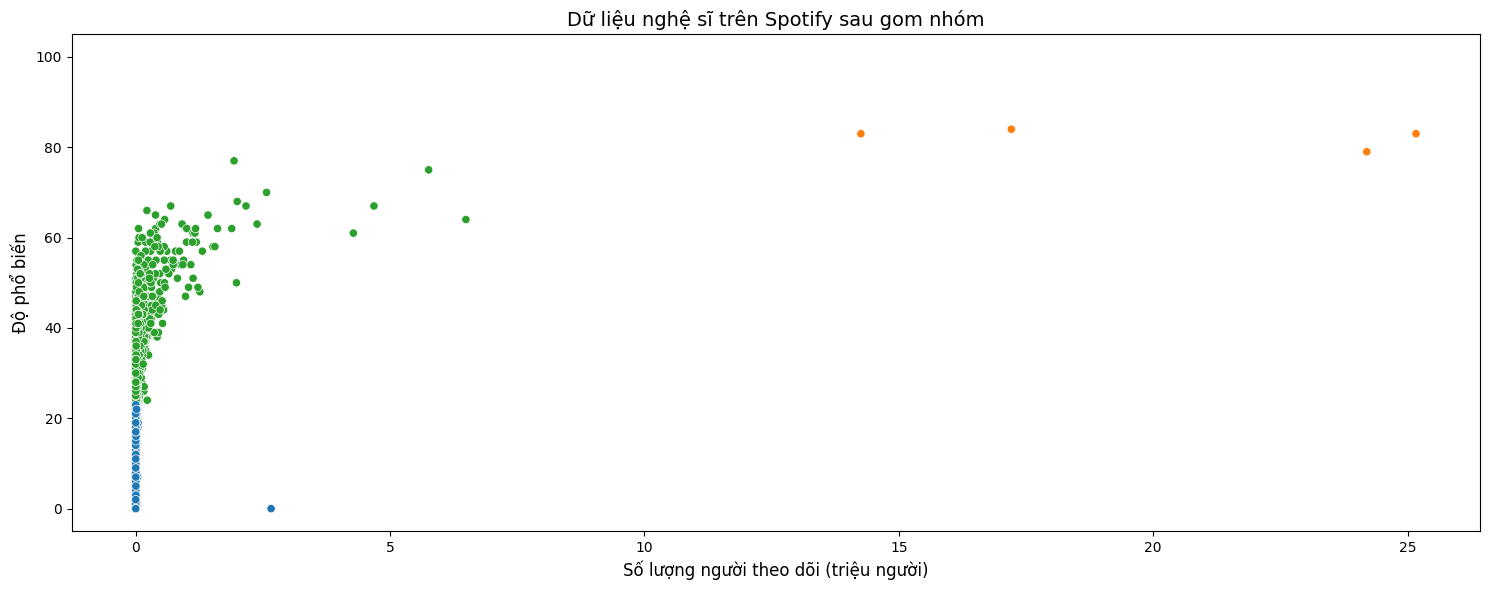

In [ ]:
cluster_colors = {0: "#1f77b4",  # Blue
                  1: "#ff7f0e",  # Orange
                  2: "#2ca02c"}  # Green

plt.figure(figsize=(15, 6))

sns.scatterplot(data=artists, x="followers", y="popularity", c=artists["cluster"].map(cluster_colors), marker="o")

plt.xlabel(xlabel="Số lượng người theo dõi (triệu người)", fontsize=12)
plt.ylabel(ylabel="Độ phổ biến", fontsize=12)
plt.title(label="Dữ liệu nghệ sĩ trên Spotify sau gom nhóm", fontsize=14)

plt.xticks(ticks=range(0, 25000001, 5000000), labels=[f"{i}" for i in range(0, 26, 5)])
plt.yticks(ticks=range(0, 101, 20))
plt.ylim(bottom=-5, top=105)

plt.savefig("k-means-followers-popularity-1.svg", format="svg", dpi=300)

plt.tight_layout()
plt.show()

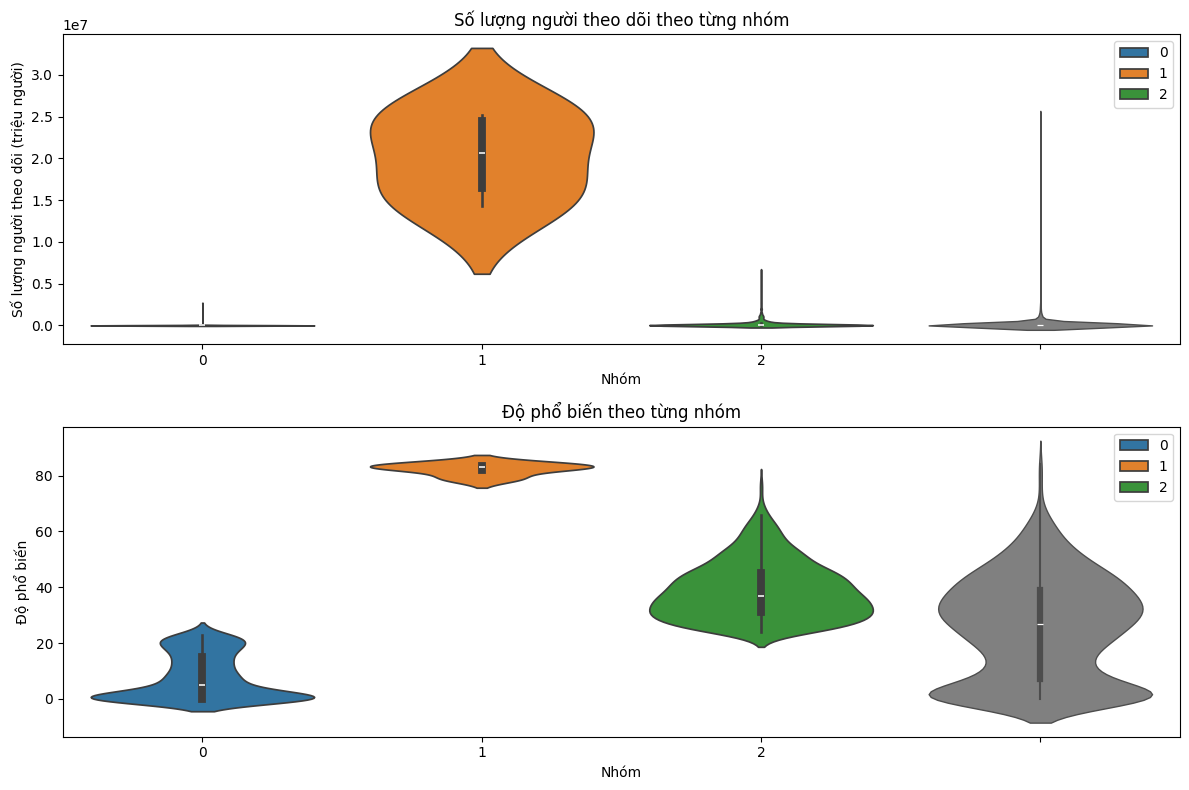

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

sns.violinplot(x=artists["cluster"], y=artists["followers"], palette=cluster_colors, hue=artists["cluster"], ax=axes[0])
sns.violinplot(y=artists["followers"], color="gray", linewidth=1, ax=axes[0])
axes[0].set_xlabel(xlabel="Nhóm")
axes[0].set_ylabel(ylabel="Số lượng người theo dõi (triệu người)")
axes[0].set_title(label="Số lượng người theo dõi theo từng nhóm")

sns.violinplot(x=artists["cluster"], y=artists["popularity"], palette=cluster_colors, hue=artists["cluster"], ax=axes[1])
sns.violinplot(y=artists["popularity"], color="gray", linewidth=1, ax=axes[1])
axes[1].set_xlabel(xlabel="Nhóm")
axes[1].set_ylabel(ylabel="Độ phổ biến")
axes[1].set_title(label="Độ phổ biến theo từng nhóm")

plt.tight_layout()
plt.savefig("k-means-followers-popularity.svg", format="svg", dpi=300)
plt.show()

**Sau khi gom nhóm, ta chia được các nghệ sĩ vào 3 nhóm**

- **Nhóm 0 (màu đỏ)** có **số lượng người theo dõi rất thấp** phân bố tập trung gần 0 cũng như có **độ phổ biến rất thấp** phần lớn **nằm dưới 20** 

    $\Rightarrow$ Điều này cho thấy đây là **nhóm nghệ sĩ mới**, chưa có lượng fan đáng kể và chưa có nhiều sự chú ý từ công chúng

- **Nhóm 1 (màu xanh lá)** sở hữu **số lượng người theo dõi rất cao**, phân bố rộng nhưng tập trung nhiều trong **khoảng từ 10 triệu đến hơn 30 triệu** người theo dõi và  sở hữu **độ phổ biến rất cao**, tập trung **ở mức 80+**

    $\Rightarrow$ Chứng tỏ đây là nhóm nghệ sĩ **có sức ảnh hưởng mạnh mẽ và đang dẫn đầu thị trường**

- **Nhóm 2 (màu xanh dương)** có **phân bố người  theo dõi rất thấp**, một số điểm có giá trị cao đột biến nhưng đa số nằm gần 0. Điều này cho thấy nhóm này **có sự chênh lệch lớn giữa các nghệ sĩ**, có thể có **một số ít người nổi bật** nhưng **phần lớn chưa có lượng fan đáng kể**

    $\Rightarrow$ Điều này cho thấy đây là **nhóm nghệ sĩ tiềm năng, một số có sức hút cao nhưng chưa đạt đến mức độ nổi tiếng như nhóm 1**


**Chiến lược phát triển**

- Những nghệ sĩ thuộc **nhóm 1** là **những nghệ sĩ nổi tiếng**, có lượng fan đông đảo, độ phổ biến cao. Vì vậy có thể **duy trì vị thế, mở rộng thị trường, khai thác các xu hướng toàn cầu**

- Những nghệ sĩ thuộc **nhóm 2** là những **nghệ sĩ có tiềm năng**. Dù họ có số lượng người theo dõi không quá nổi bật nhưng bù lại họ có mức độ phổ biến đa dạng. Vì thế họ **có thể hợp tác với nghệ sĩ lớn, đầu tư vào quảng bá để gia tăng tầm ảnh hưởng**

- Cuối cùng, những nghệ sĩ thuộc **nhóm 0** là những **nghệ sĩ mới** do vậy họ có lượng fan ít và độ phổ biến còn thấp. Do đó, họ **có thể tận dụng các nền tảng mạng xã hội để quảng cáo để thu hút sự chú ý**